In [38]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.gaussian_process as gpr
from sklearn.gaussian_process.kernels import ConstantKernel, RBF

In [64]:
kernel = kernel = ConstantKernel(constant_value=1.0) * RBF(length_scale=1)
gp = gpr.GaussianProcessRegressor(kernel=kernel,alpha=1e-2)
f = lambda x: np.sin(5*x)/2
xx = np.arange(-1,1,0.01).reshape([-1,1])

/home/kellan/.local/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


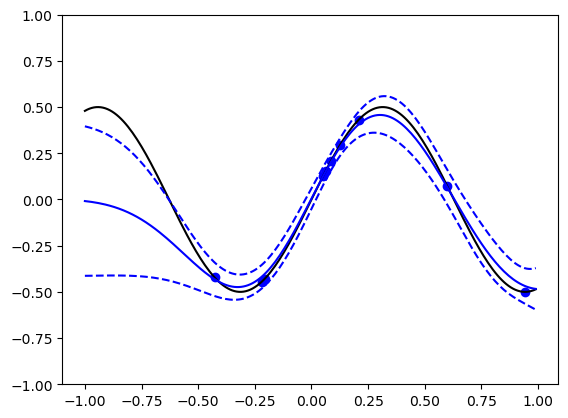

In [69]:
X = []
Y = []
for i in range(10):
    x = np.random.uniform(-1,1)
    y = f(x)

    X.append([x])
    Y.append([y])

    gp.fit(np.array(X),np.array(Y))
    mu,sig=gp.predict(xx, return_std=True)

    plt.clf()
    plt.plot(xx,f(xx),c='k')
    plt.scatter(X,Y,c='b')
    plt.plot(xx,mu,c='b')
    plt.plot(xx,mu+sig,'b--')
    plt.plot(xx,mu-sig,'b--')
    plt.ylim([-1,1])
    
    plt.savefig("gpr_plot"+str(i)+".png")